# DAY 14: Clustering Algorithms
### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: August 13th, 2:00 pm Kigali Time

**First name**: _________________________________________________________


**Last name**: _____________

## Learning Goals:

1. be able to train a logistic regression with linear and polynomial boundaries
2. understand and address the problem of class imbalance in classification
3. identify the appropriate evaluation metrics for real-life problems

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

# load sklearn libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.datasets import make_moons

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Helper functions

In [ ]:
def load_microbial_data(n=500):
    z = np.random.randint(0, high=3, size=(n,))
    c1 = np.random.multivariate_normal([-1.0, -1.0], [[0.3, 0.1], [0.1, 0.3]], size=n)
    c2 = np.random.multivariate_normal([1.5, -1.5], [[2.8, -0.2], [-0.2, 3.2]], size=n)
    c3 = np.random.multivariate_normal([0.0, 1.0], [[1., 0.0], [0.0, 0.2]], size=n)

    samples = 0.0
    for idx, c in enumerate([c1, c2, c3]):
        samples += c * np.expand_dims(z == idx, axis=-1)

    return samples


def load_moons_data(n=500):
    return make_moons(n_samples=n, noise=0.17)[0]


def plot_first_two_features(X):
    plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    plt.xlabel('size (micrometer)')
    plt.ylabel('luminiscence score')
    plt.show()

def plot_clusters(X, z_predict, centers=None):
    plt.scatter(X[:, 0], X[:, 1], c=z_predict, s=50, cmap='viridis', alpha=0.5)
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='black', edgecolors='white', s=100)
    plt.show()

# Analysis of microbial communities in Lake Kivu

Water resources experts from Rwanda and Democratic Republic of Congo and other stakeholders are discussing ways to make [Lake Kivu more resourceful](https://www.newtimes.co.rw/section/read/213391) to positively impact the peoples of both countries.

You have been contacted by a group of microbial biologists that are currently analyzing the ecosystem of lake Kivu in Rwanda. In particular, they are investigating how microbial communities assemble and change in the lake, and whether these processes are predictable.

They just sent you two dataset of microbial data.

Let's first load the datasets and visualize them.

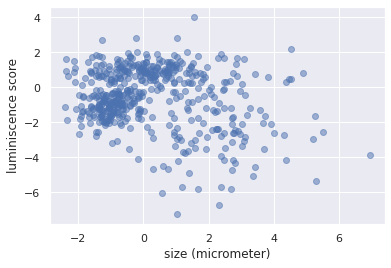

In [ ]:
# Load the data-set #1
X1 = load_microbial_data()

# Visualize data-set #1
plot_first_two_features(X1)

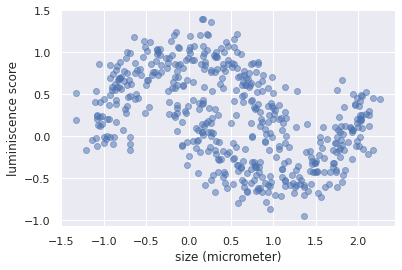

In [ ]:
# Load the data-set #2
X2 = load_moons_data()

# Visualize data-set #2
plot_first_two_features(X2)

**Exercise 1:** For each dataset, explain whether or not you would explect GMMs to be able to model the data well. Support your answer with concepts from lecture.

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

We cluster the first dataset using DBSCAN. 

**Exercise 2:** Visualize the clusters found using DBSCAN (the purple indicates noise points that do not belong to any cluster).

What do the parameters `eps` and `min_samples` represent? Relate your answer to concepts in the lecture. Try different settings of both parameters. How do these parameters affect the clusters found by DBSCAN.

Find the optimal parameter settings for DBCAN.

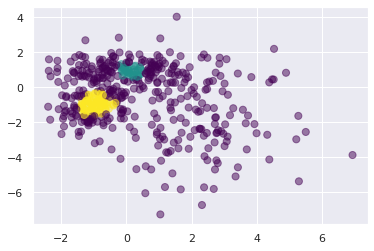

In [ ]:
# Step 1: Instantiate the DBSCAN object
dbscan = DBSCAN(eps=0.3, min_samples=20)

# Step 2: Fit the DBSCAN and get the predictions
clusters = dbscan.fit_predict(X1)

# Step 3: Visualize the clusters
plot_clusters(X1, clusters)

We cluster the second dataset using DBSCAN. 

**Exercise 3:** Visualize the clusters found using DBSCAN (the purple indicates noise points that do not belong to any cluster).

Find the optimal settings of `eps` and `min_samples` for DBCAN.

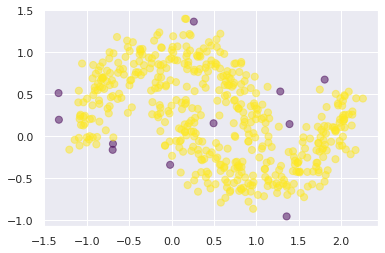

In [ ]:
# Step 1: Instantiate the DBSCAN object
dbscan = DBSCAN(eps=0.2, min_samples=10)

# Step 2: Fit the DBSCAN and get the predictions
clusters = dbscan.fit_predict(X2)

# Step 3: Visualize the clusters
plot_clusters(X2, clusters)

## Gaussian Mixture Models (GMM)

We cluster the first dataset using GMM. 

**Exercise 4:** Visualize the clusters found using GMM.

What does the parameter `n_components` represent? Relate your answer to concepts in the lecture. Try different settings of this parameter. How do this parameter affect the clusters found by GMM?

Find the optimal parameter setting for GMM.

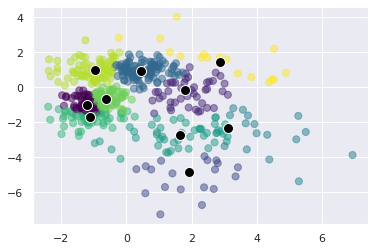

In [ ]:
# Step 1: Create the Gaussian Mixture Model objective
gmm = GaussianMixture(n_components=10)

# Step 2: Fit the model
gmm.fit(X1)

# Step 3: Predict the clusters
gmm_assignments = gmm.predict(X1)

# Step 4: Get the centers of the clusters
centers = gmm.means_

# Step 5: Visualize the clusters
plot_clusters(X1, gmm_assignments, centers=centers)

We cluster the second dataset using DBSCAN. 

**Exercise 5:** Visualize the clusters found using GMM.

Find the optimal parameter setting for GMM.

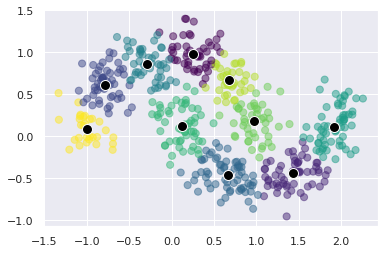

In [ ]:
# Step 1: Create the Gaussian Mixture Model objective
gmm = GaussianMixture(n_components=10)

# Step 2: Fit the model
gmm.fit(X2)

# Step 3: Predict the clusters
gmm_assignments = gmm.predict(X2)

# Step 4: Get the centers of the clusters
centers = gmm.means_

# Step 5: Visualize the clusters
plot_clusters(X2, gmm_assignments, centers=centers)

## Spectral Clustering

We cluster the first dataset using Spectral Clustering.  

**Exercise 5:** Visualize the clusters found using Spectral Clustering. 

What does the parameter `n_clusters` represent? Relate your answer to concepts in the lecture. Try different settings of this parameter. How does this parameter affect the clusters found by Spectral Clustering? 

Find the optimal parameter setting for Spectral Clustering.



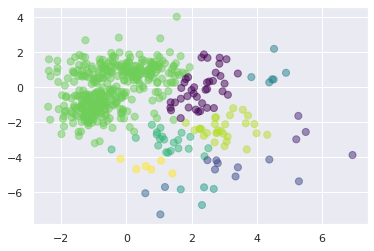

In [ ]:
# Step 1: Create the Gaussian Mixture Model objective
spectral = SpectralClustering(n_clusters=10)

# Step 2: Fit the model and use it to predict the clusters
spectral_assignments = spectral.fit_predict(X1)

# Step 3: Visualize the clusters
plot_clusters(X1, spectral_assignments)

**Exercise 6:** Visualize the clusters found using Spectral Clustering. 

Find the optimal parameter setting for Spectral Clustering.

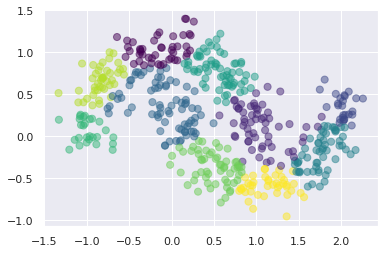

In [ ]:
# Step 1: Create the Gaussian Mixture Model objective
spectral = SpectralClustering(n_clusters=10)

# Step 2: Fit the model and use it to predict the clusters
spectral_assignments = spectral.fit_predict(X2)

# Step 3: Visualize the clusters
plot_clusters(X2, spectral_assignments)

**Exercise 7:** Summarize the performance of the three clustering algorithms on the first dataset, which algorithm does best? Why do you think that is?

Summarize the performance of the three clustering algorithms on the second dataset, which algorithm does best? Why do you think that is?

Based on your experience can you guess which algorithm suits what kind of datasets the best?